In [9]:
%matplotlib inline

import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

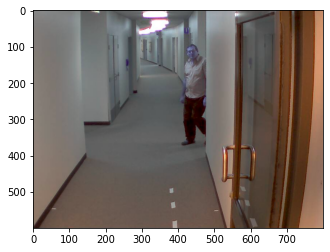

In [137]:
input_image = cv2.imread("/home/oole/Data/Chokepoint/data/P2L_S1/P2L_S1_C1/P2L_S1_C1.1/00000362.jpg")
input_image = tf.constant(input_image)
input_image
padded = tf.pad(input_image, [[32,32],[32,32],[0,0]], mode='SYMMETRIC')
transposed = tf.transpose(input_image, [2,0,1])
retrans = tf.transpose(transposed, [1,2,0])
plt.imshow(retrans)
plt.show()


In [120]:
xmax= 472
ymax=143
xmin=424
ymin=94
# 

In [132]:
single_bbox = tf.constant([xmin+padd, ymin+padd, xmax+padd, ymax+padd])

single_bbox

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([456, 126, 504, 175], dtype=int32)>

In [133]:
# ymin, xmin, ymax-ymin, xmax-xmin
cropped_to_bb = tf.image.crop_to_bounding_box(padded, single_bbox[1],single_bbox[0],single_bbox[3]-single_bbox[1],single_bbox[2]-single_bbox[0])


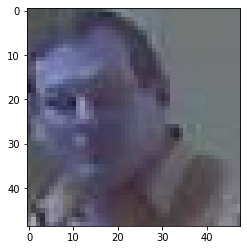

In [134]:
plt.imshow(cropped_to_bb.numpy())
plt.show()

In [140]:
bboxs = tf.constant([[xmin, ymin, xmax, ymax],[xmin, ymin, xmax, ymax]])
bboxs = tf.constant([[xmin, ymin, xmax, ymax]])

In [141]:
out = tf.map_fn(fn = lambda box: tf.image.crop_to_bounding_box(input_image, box[1],box[0],box[3]-box[1],box[2]-box[0]), elems=bboxs, fn_output_signature=tf.uint8)

In [142]:
out

<tf.Tensor: shape=(1, 49, 48, 3), dtype=uint8, numpy=
array([[[[ 79,  81,  82],
         [ 83,  85,  86],
         [ 79,  81,  82],
         ...,
         [111, 119, 119],
         [111, 119, 119],
         [111, 119, 119]],

        [[ 78,  80,  80],
         [ 82,  84,  84],
         [ 78,  80,  81],
         ...,
         [111, 119, 119],
         [113, 118, 119],
         [111, 119, 119]],

        [[ 83,  84,  82],
         [ 81,  82,  80],
         [ 81,  83,  83],
         ...,
         [113, 118, 119],
         [114, 118, 119],
         [113, 118, 119]],

        ...,

        [[101, 102, 106],
         [120, 120, 126],
         [ 60,  59,  68],
         ...,
         [130, 128, 134],
         [123, 123, 129],
         [111, 111, 117]],

        [[120, 120, 126],
         [165, 164, 173],
         [ 75,  74,  84],
         ...,
         [139, 137, 143],
         [127, 127, 133],
         [104, 104, 110]],

        [[140, 140, 146],
         [169, 168, 177],
         [104, 103, 

In [143]:
padd = 32
padded = tf.pad(input_image, [[padd,padd],[padd,padd],[0,0]], mode='SYMMETRIC')

max_width = 800
max_height = 600
img_size = 224
bb_xmins = bboxs[:, 0] + padd
bb_ymins = bboxs[:, 1] + padd
bb_xmaxs = bboxs[:, 2] + padd
bb_ymaxs = bboxs[:, 3] + padd
bb_widths = bb_xmaxs - bb_xmins
bb_heights = bb_ymaxs - bb_ymins
bb_expand_width = (224 - bb_widths) // 2
bb_expand_height = (224 - bb_heights) // 2
# print(bb_expand_height)
# print(bb_expand_width)
# print(bb_xmins)
bb_xmins_expanded = bb_xmins - bb_expand_width
bb_xmaxs_expanded = bb_xmaxs + bb_expand_width
bb_ymins_expanded = bb_ymins - bb_expand_height
bb_ymaxs_expanded = bb_ymaxs + bb_expand_height
crop_width = bb_xmaxs_expanded - bb_xmins_expanded
crop_height = bb_ymaxs_expanded - bb_ymins_expanded
missing_width = tf.abs(img_size - crop_width)
missing_height = tf.abs(img_size - crop_height)
bb_xmaxs_expanded = bb_xmaxs_expanded + missing_width
bb_ymaxs_expanded = bb_ymaxs_expanded + missing_height
expanded_bboxes = tf.stack((bb_xmins_expanded, bb_ymins_expanded, bb_xmaxs_expanded, bb_ymaxs_expanded), axis=-1)
print(expanded_bboxes)
recollected = tf.stack((bb_xmins, bb_ymins, bb_xmaxs, bb_ymaxs), axis=-1)
print(recollected)

tf.Tensor([[368  39 592 263]], shape=(1, 4), dtype=int32)
tf.Tensor([[456 126 504 175]], shape=(1, 4), dtype=int32)


In [150]:
expanded_bboxes

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[368,  39, 592, 263]], dtype=int32)>

In [146]:

out = tf.map_fn(fn = lambda box: tf.image.crop_to_bounding_box(padded, box[1],box[0],box[3]-box[1],box[2]-box[0]), elems=expanded_bboxes, fn_output_signature=tf.uint8)

(224, 224, 3)


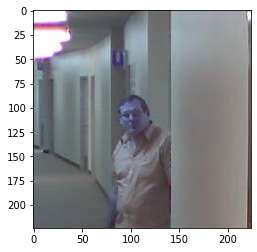

In [129]:
print(out[0].shape)
plt.imshow(out[0].numpy())
plt.show()

In [148]:
tf.image.crop_and_resize(padded, expanded_bboxes, (224,224))
print(out[0].shape)
plt.imshow(out[0].numpy())
plt.show()

TypeError: crop_and_resize_v2() missing 1 required positional argument: 'crop_size'